# In Ensemble Part

===============================================================================================================

    Assignment1) Implementing K-Nearest Neighbor Algorithm

    Assignment2) Build Bagging Classifier Based on KNN (using assignment 1)

    Assignment3) Build Bagging Regression Based on KNN (using assignment 1)

===============================================================================================================

### Importing Modules

In [2]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import random

#importing original data
from sklearn import datasets

### Assignments1 : Make the KNN Algorithm

In [3]:
def distance(X1, X2):
    dist = np.sqrt(np.sum((X1-X2)**2,axis=1))
    return dist

In [4]:
def knn(test_set, train_input,train_output, neigbor_num, model_type, p_rate_train, n_estimator):

    global knn_predict
    global final_predict
    
    inputs = train_input
    outputs = train_output
    
    knn_predict=[]
    
    for i in range(n_estimator):
        rand_idx = random.sample(range(len(inputs)),int(len(inputs)*p_rate_train))
        rand_data, rand_y = inputs[rand_idx], outputs[rand_idx]
        neighbor_idx = np.argsort([distance(rand_data, new_xi) for new_xi in test_set],axis=1)[:,:neigbor_num]

        if model_type=='class':    
            new_y_of_x=[sorted(Counter(xi), key=Counter(xi).get, reverse=True)[0] for xi in rand_y[neighbor_idx]]
        else:
            new_y_of_x=np.mean(rand_y[distance_idx],axis=1)
            
        knn_predict.append(new_y_of_x)
        
    knn_predict=np.array(knn_predict)
        
    if model_type=="class":    
        final_predict=[sorted(Counter(knn_predict.T[i]), key=Counter(knn_predict.T[i]).get, reverse=True)[0] for i in range(0,len(knn_predict.T))]
    else:
        final_predict=np.mean(knn_predict.T,axis=1)
        
    final_predict=np.array(final_predict)
    
    return knn_predict, final_predict

### Assignments2 : Build BaggingClassifier

- Dataset

In [5]:
iris=datasets.load_iris()
data=iris['data'] # 4 variables
data=data[:,:2] # 2 variables selected
target=iris['target']

- making boundary points data

In [6]:
x_min, x_max=[min(data[:,i])-1 for i in range(0,len(data[0]))], [max(data[:,i])+1 for i in range(0,len(data[0]))]
new_x=np.vstack(np.linspace(x_min[i],x_max[i],100).reshape(1,100) for i in range(len(data[0]))).T
new_x=new_x[:,:2] # 변수 선택
XX,YY=np.meshgrid(new_x[:,0],new_x[:,1])
new_x=np.c_[XX.ravel(),YY.ravel()]

- Run KNN Classifiter

In [7]:
#run KNN-Classifier
knn(new_x, data ,target, 1, 'class', p_rate_train= 0.7, n_estimator = 3)

(array([[0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]]), array([0, 0, 0, ..., 2, 2, 2]))

- Plot 1 : each estimator Boundary

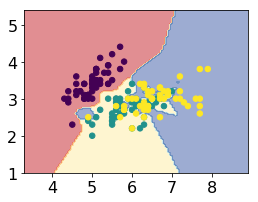

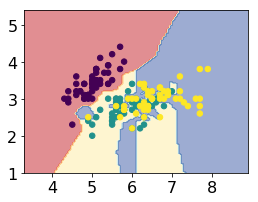

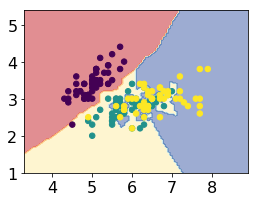

In [13]:
for i in range(len(knn_predict)):
    plt.subplots(figsize = (4,3))
    plt.contourf(XX,YY,knn_predict[i].reshape(XX.shape),cmap=plt.cm.RdYlBu, alpha=0.5)
    plt.scatter(data[:,0],data[:,1],c=target,s=30)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

- Plot 2 : overlap estimator Boundary

(array([1., 2., 3., 4., 5., 6.]), <a list of 6 Text yticklabel objects>)

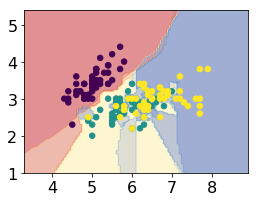

In [14]:
plt.subplots(figsize = (4,3))

for i in range(0,len(knn_predict)):
    plt.contourf(XX,YY,knn_predict[i].reshape(XX.shape),cmap=plt.cm.RdYlBu, alpha=0.2)
    
plt.scatter(data[:,0],data[:,1],c=target,s=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

- Plot 3 : final estimator Boundary

In [ ]:
fig, ax=plt.subplots()
fig.set_size_inches(8,7)
plt.contourf(XX,YY,final_predict.reshape(XX.shape),cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(data[:,0],data[:,1],c=target,s=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)